# Little's Power Law Data Analysis    
In this notebook I will explore answers to questions that have bothered me in my software delivery role. Why I cannot use vanilla Little's Law to predict / forecast when piece of work will be ready, and what can I do to make it useful. 
 
### Data Background
"Sprint Team" anonymised data was kindly provided by one of my employers. Data represents 1 feature team over 1 year period.

## Data loading, cleaning and initial visualisations 

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sprints = pd.read_csv("sprintTeam.csv")
display(sprints.head())

,Sprint,CycleTime,LeadTime
0,A,1,4
1,A,3,10
2,A,6,10
3,A,0,10
4,A,4,10


array([[<AxesSubplot:title={'center':'CycleTime'}>,
        <AxesSubplot:title={'center':'LeadTime'}>]], dtype=object)

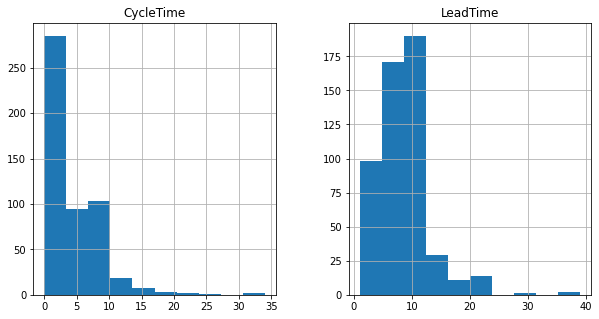

In [8]:
sprints.describe()
sprints.hist(figsize=(10,5))

Number of work items per Sprint mean: 19, median:19, std: Count    6.149421
dtype: float64


/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_9086/33208961.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sprints_workitem_count_median = sprints_workitem_count.median().Count.astype(int)
/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_9086/33208961.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sprints_workitem_count_mean = sprints_workitem_count.mean().Count.astype(int)
/var/folders/99/ynczk9ks3zdgh2_9d1d_5trw0000gn/T/ipykernel_9086/33208961.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

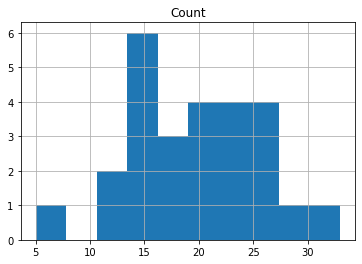

In [11]:
sprints_workitem_count = sprints.groupby('Sprint').agg(Count =('Sprint', 'count'))
sprints_workitem_count = sprints_workitem_count.reset_index()
sprints_workitem_count_median = sprints_workitem_count.median().Count.astype(int)
sprints_workitem_count_mean = sprints_workitem_count.mean().Count.astype(int)
sprints_workitem_count_std = sprints_workitem_count.std()
sprints_workitem_count.hist()

print("Number of work items per Sprint mean: {0}, median:{1}, std: {2}".format(sprints_workitem_count_mean, sprints_workitem_count_median,  sprints_workitem_count_std))